Requests:
- visualization
- if /then
- try / except

- img analysis
- cmd line python program


In [1]:
import pandas as pd

df = pd.read_csv('imaging_rates.csv', parse_dates=['Date'])

df['rate'] = round(df['qty_imaged'] / df['minutes_spent'], 3)

df['tot_min'] = df.groupby('name')['minutes_spent'].cumsum()

df['tot_hours'] = round(df['tot_min'] / 60, 2)

df.head(5)

,Date,name,qty_imaged,minutes_spent,Were there any setbacks? Please describe.,rate,tot_min,binned,tot_hours
0,2017-01-10,Emma,190.0,180.0,NaN,1.056,180.0,"(120.0, 180.0]",3.00
1,2017-01-10,Vincent,242.0,175.0,NaN,1.383,175.0,"(120.0, 180.0]",2.92
2,2017-01-10,Emma,198.0,180.0,NaN,1.100,360.0,"(120.0, 180.0]",6.00
3,2017-01-10,Emma,226.0,182.0,NaN,1.242,542.0,"(180.0, 240.0]",9.03
4,2017-01-10,Chloe,404.0,190.0,NaN,2.126,190.0,"(180.0, 240.0]",3.17


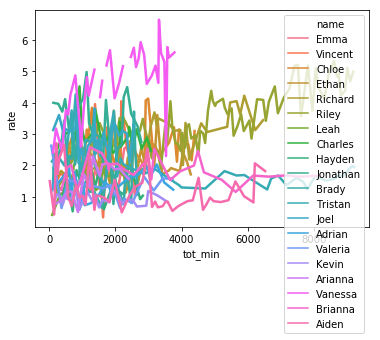

In [116]:
import seaborn as sns
# Import Matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

# https://seaborn.pydata.org/examples/index.html

sns.lineplot(x='tot_min', 
             y='rate', 
             hue='name',
             data=df,
             linewidth=2.5)

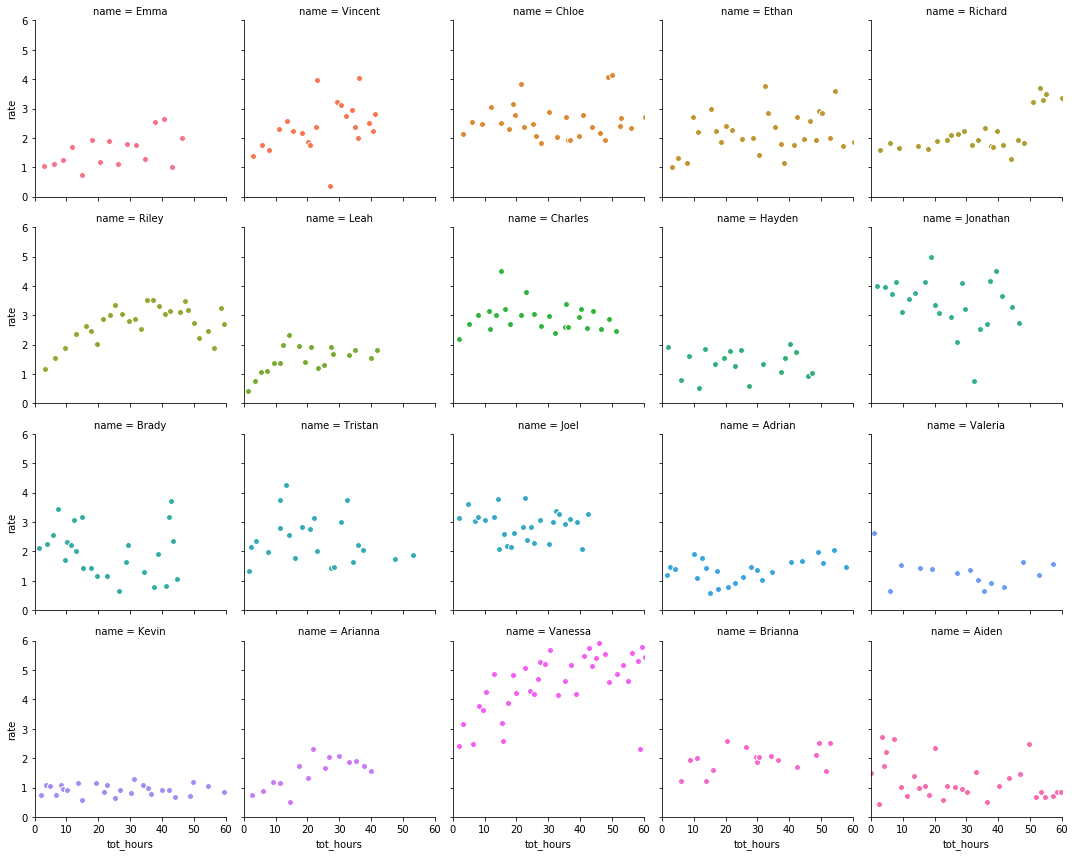

In [115]:
g = sns.FacetGrid(df, hue="name", col="name", col_wrap=5)

# 3 options to choose from
g.map(plt.scatter, 'tot_hours', "rate", edgecolor="white")
#g.map(plt.plot, 'tot_hours', 'rate', marker="o")
#g.map(sns.regplot, 'tot_hours', "rate", x_bins=range(0,60))

g.set(ylim=(0, 6), xlim=(0, 60))

[(0, 6), (0, 60)]

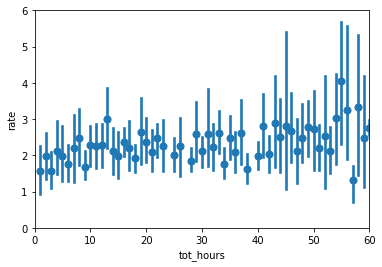

In [114]:
g = sns.regplot(x='tot_hours', y='rate',data=df, x_bins= range(1,61))
g.set(ylim=(0, 6), xlim=(0, 60))

In [5]:
bins = range(0,120)
df['binned'] = pd.cut(df['minutes_spent'], bins)